# Project: Investigate a Dataset - [TMDB 5000 Movie]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The TMDB 5000 movie dataset contains over 10,000 movies collected and downloaded from Kaggle. The dataset gives some indicators and properties of each movie produced like for example, the cast, producers, movie budget, revenue generated, the reviews etc.

The dataset has the following columns: 

- id: This is the Id column
- imdb_id: This is the ID from IMDB is the combination a numeric and an alphabet.
- popularity: This rates the movie of how popular was.
- budget: The movie budget which is assumed to be in US Dollars
- revenue: The movie generated from the sales of the movie which is assumed to be in US Dollars
- original_title: The title of the Movie
- cast: This column contains the actors and actresses that took part in the movie and it is seperated by " | "
- homepage: This give the individual websites for each movie 
- director: This list the directors for each movie and it is seperated by " | "
- tagline: This is the story tagline
- keywords: This contains keywords that described the movie and it is seperated by " | "
- overview: This gives the brief intro to the movie
- runtime: This is the time duration of the movie in minutes
- genres: Movie category and and it is seperated by " | "
- production_companies: These are the list of companies that produced each movie and it is seperated by " | "
- release_date: The date each movie was released to the public
- vote_count: The amount of votes
- vote_average: The average votes
- release_year: The actual year, the movie was released
- budget_adj: The adjusted bugdet for each movie
- revenue_adj: The adjusted revenue for each movie 


### Question(s) for Analysis
In the cause of analysis, we will be answering some research questions to best understand the data. Below are the listed questions to get answers from our data:

1. What kinds of properties are associated with movies that have high revenues?
2. What are the Top 10 most appeared movie cast?
3. What is the Distribution of movie genres
4. What are the Top 20 Movie Production Companies?
5. Describe the Correlation between budget and revenue to popularity
6. What are the Top 20 Movie Directors?

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
Here in this section, we will load the data, check for how clean the data is, that is missing values and the number of duplicates

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
movie = pd.read_csv('tmdb-movies.csv')

In [3]:
movie.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We have some columns having some missing data even though the datatypes are correct as seen above. Next, we investigate the actual number of missing for each column of the table.

In [5]:
movie.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Apparently, We have 9 columns with a number of missing values. The missing values however, We won't dropped as it is not neccesary. Next, we check for duplicates.

In [6]:
movie.duplicated().sum()

1

So just 1 duplicates in the data, which is necessary to be dropped.


### Data Cleaning

Here we will dealing with the duplicated rows by dropping them so it doesn't our figures.

In [7]:
movie = movie.drop_duplicates()

In [8]:
movie.duplicated().sum()

0

Now we have no duplicates.

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 (What kinds of properties are associated with movies that have high revenues?)

In [9]:
#Here we take the 25th quartile, 50th quartile and the maximum of the revenue column for the category 
# low, Medium and High respectively.
# This will be used to segment the data and creating a new column for `revenue_levels`
movie.revenue[movie.revenue!=0].describe()

count    4.849000e+03
mean     8.923886e+07
std      1.620801e+08
min      2.000000e+00
25%      7.732325e+06
50%      3.185308e+07
75%      9.996575e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [10]:
level = ['low','medium','high']
movie['revenue_levels'] = pd.cut(movie.revenue,bins=[-1,7708081.25,31853080.0,2781505847],labels=level)

In [11]:
movie.groupby('revenue_levels').mean()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
revenue_levels,,,,,,,,,,
low,81118.311566,0.349611,3.049533e+06,3.869975e+05,98.047731,48.575125,5.866740,2001.906613,3.929734e+06,6.065696e+05
medium,34427.196208,0.629742,1.549202e+07,1.818921e+07,106.008244,148.356142,6.029926,1997.363561,2.087461e+07,2.994342e+07
high,37016.424505,1.539919,4.870422e+07,1.682585e+08,112.101073,755.358911,6.270380,2001.558993,5.649942e+07,2.134565e+08


It appears that columns like popularity, budget, vote counts are various properties that are associated with movies with high revenue.

### Research Question 2  (Top 10 most appeared movie cast)

We will be creating a function that will help get the individual movie caster and be helpful for other queries as well

In [12]:
# this function split the data by '|'
def str_split(data):
    data = data[data.notna()]
    container = []
    for row in data:
        container += row.split('|')
    
    return pd.Series(container)

In [13]:
str_split(movie.cast).value_counts().head(25)

Robert De Niro        72
Samuel L. Jackson     71
Bruce Willis          62
Nicolas Cage          61
Michael Caine         53
Robin Williams        51
John Cusack           50
Morgan Freeman        49
John Goodman          49
Liam Neeson           48
Susan Sarandon        48
Alec Baldwin          47
Julianne Moore        47
Christopher Walken    46
Johnny Depp           46
Tom Hanks             46
Gene Hackman          46
Willem Dafoe          45
Dennis Quaid          45
Sylvester Stallone    45
Clint Eastwood        44
Ed Harris             44
Meryl Streep          44
Donald Sutherland     44
Antonio Banderas      43
dtype: int64

The above is the frequency distribution of the top 25 movie cast that has appeared in movies based on our data.

In [14]:
top_10_cast = str_split(movie.cast).value_counts().head(10)

Next, we will be visualizing our findings on a bar chart to give a clearer picture of who has the highest down to the lowest on the list. A bar chart will be a great chioce for visualizing a frequency table.

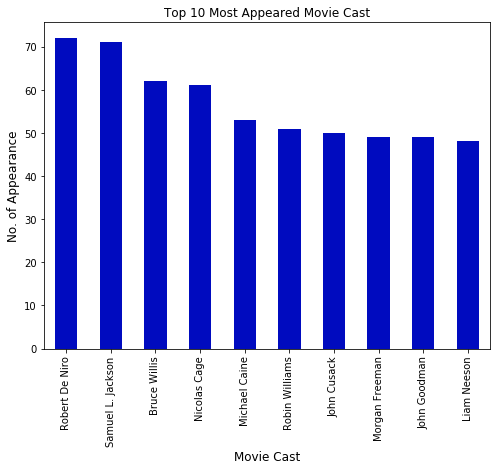

In [15]:
top_10_cast.plot(kind='bar',color='#000BBF',figsize=(8,6),title='Top 10 Most Appeared Movie Cast');
plt.xlabel("Movie Cast",fontsize=12);
plt.ylabel("No. of Appearance",fontsize=12);

From the chart above `Robert De Niro` appeared most in movies than the rest with a total appearance of 72, followed by `Samuel L. Jackson` with 71 total appearances based on the data given. This could be an age baise as they could have probably have started movie acting at very early age or have been born in the 17's or 18's.

### Research Question 3  (Distribution of movie genres)

In [25]:
genre = str_split(movie.genres).value_counts()
genre

Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
dtype: int64

Now, we want to see which the highest movie produced based on genre. Since we have the frequency table of the list of genre, we will use the bar chart to visual that to give us a clear sense of the distribution.

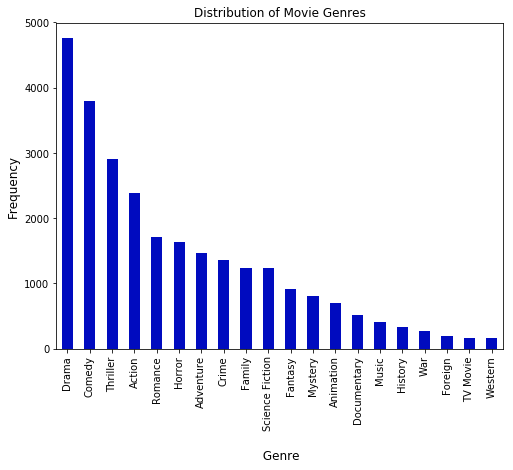

In [18]:
genre.plot(kind='bar',color='#000BBF',figsize=(8,6),title='Distribution of Movie Genres');
plt.xlabel("\n Genre",fontsize=12);
plt.ylabel("Frequency",fontsize=12);

Based on the data given, it appeares that `Drama`has the highest number of the category of movie produced with a frequency of 4,760 followed by`comedy` with 3,793. Alot of persons love drama and comedy, because these two tends to give mixed up other genre in one way or other.

### Research Question 4  (Top 20 Movie Production Companies)

In [19]:
top_20_prod_comp = str_split(movie.production_companies).value_counts().head(20)
top_20_prod_comp

Universal Pictures                        522
Warner Bros.                              509
Paramount Pictures                        431
Twentieth Century Fox Film Corporation    282
Columbia Pictures                         272
New Line Cinema                           219
Metro-Goldwyn-Mayer (MGM)                 218
Walt Disney Pictures                      214
Touchstone Pictures                       178
Columbia Pictures Corporation             160
TriStar Pictures                          147
Miramax Films                             139
Relativity Media                          108
Regency Enterprises                        95
Canal+                                     92
Village Roadshow Pictures                  88
DreamWorks SKG                             88
20th Century Fox                           88
BBC Films                                  87
Dimension Films                            82
dtype: int64

As since above, the table is a frequency table and to show a proper visual of a frequency table then a bar chart wil be used to show the frequency distribution of the production companies and the number of movies produced.

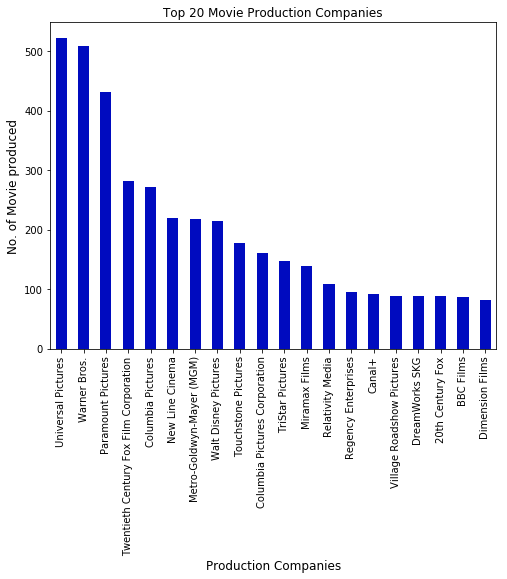

In [20]:
top_20_prod_comp.plot(kind='bar',color='#000BBF',figsize=(8,6),title='Top 20 Movie Production Companies');
plt.xlabel("Production Companies",fontsize=12);
plt.ylabel("No. of Movie produced",fontsize=12);

The chart above shows that `Universal Pictures` as a production company has produced the highest number of movies, with 522 movies to be precise which is based on the data and it is followed by The `Warner Bros.` with 509 movies produced.

### Research Question 5 (Correlation between budget and revenue to popularity)

We will want to show how budget and revenue relates to popularity. To show this better, we will use the regression plot in the seaborn library to visualize the relationship.

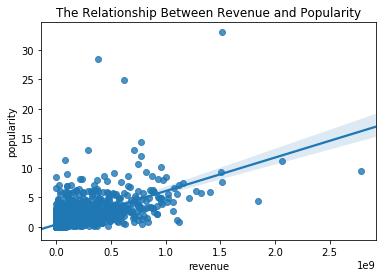

In [26]:
sns.regplot( x = 'revenue',y ='popularity',data=movie)
plt.title("The Relationship Between Revenue and Popularity",fontsize=12);

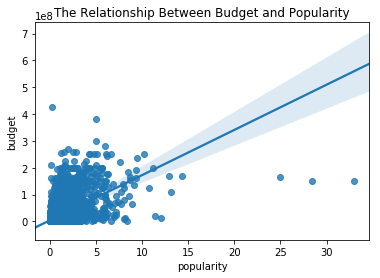

In [27]:
sns.regplot( y = 'budget',x='popularity',data=movie)
plt.title("The Relationship Between Budget and Popularity");


These show positive correlation to popularity as to revenue and budget. This means that revenue and budget has a way of increasing the chances for a movie to be popular.

### Research Question 6 (Top 20 Movie Directors)

In [23]:
directors = str_split(movie.director).value_counts().head(20)
directors

Woody Allen             46
Clint Eastwood          34
Martin Scorsese         31
Steven Spielberg        30
Ridley Scott            23
Steven Soderbergh       23
Ron Howard              22
Joel Schumacher         21
Brian De Palma          20
Tim Burton              20
Barry Levinson          19
John Carpenter          19
Robert Rodriguez        19
David Cronenberg        19
Francis Ford Coppola    19
Wes Craven              19
Rob Reiner              18
Walter Hill             18
Mike Nichols            18
John Landis             18
dtype: int64

Here we will also want to clearly see the distribution of the top 20 Directors and the numbers of movies they have directed in lifetime based on the data given to us. Yes, you guessed it!, we will be using bar chart again to illustrate this.

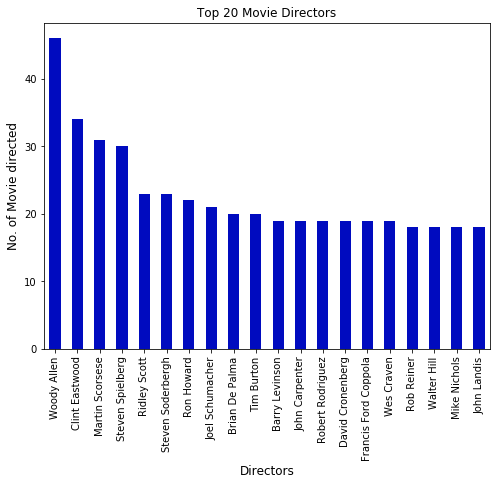

In [24]:
directors.plot(kind='bar',color='#000BBF',figsize=(8,6),title='Top 20 Movie Directors');
plt.xlabel("Directors",fontsize=12);
plt.ylabel("No. of Movie directed",fontsize=12);

This chart shows that `Woody Allen` has the highest of movie directed, followed by `Clint Eastwood`

<a id='conclusions'></a>
## Conclusions

The whole point of this analysis was to describe and give meaningful insights from the data given. Below are some of the insights extracted from the analysis:

1. feautures like popularity, budget, vote counts are the various properties that are associated with movies with high revenue.
2. Universal pictures ranked the highest in movie production, followed by Warner Bros.
3. Budget and revenue are correlated to popularity which was confirms point 1.
4. Robert De Niro acted 72 movies based on the data followed by Samuel L. Jackson with 71 movies
5. Drama has the highest kind of movie produced, followed by comedy.

However, there are some **limitations** found during the analysis which are:
1. There is no way to truly compare or show the true representation of the movie cast as we don't have enough information about their ages to clearer show the age distribution since some of the actors or actress maybe older than the rest. This can actually to give some artist advantage over the rest due to age difference. The same goes for Production companies, Directors.

In [29]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0